<a href="https://colab.research.google.com/github/adhang/learn-tensorflow/blob/main/NLP_IMDB_Reviews_(Subwords).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NLP - IMDB Reviews Using Subwords Tokenization

Author: Adhang Muntaha Muhammad

[![LinkedIn](https://img.shields.io/badge/linkedin-0077B5?style=for-the-badge&logo=linkedin&logoColor=white&link=https://www.linkedin.com/in/adhangmuntaha/)](https://www.linkedin.com/in/adhangmuntaha/)
[![GitHub](https://img.shields.io/badge/github-121011?style=for-the-badge&logo=github&logoColor=white&link=https://github.com/adhang)](https://github.com/adhang)
[![Kaggle](https://img.shields.io/badge/kaggle-20BEFF?style=for-the-badge&logo=kaggle&logoColor=white&link=https://www.kaggle.com/adhang)](https://www.kaggle.com/adhang)
[![Tableau](https://img.shields.io/badge/tableau-E97627?style=for-the-badge&logo=tableau&logoColor=white&link=https://public.tableau.com/app/profile/adhang)](https://public.tableau.com/app/profile/adhang)
___

I will use the pre-tokenized dataset that is using subword text encoding, an alternative to word-based tokenization.

# Libraires & Variables

In [ ]:
import numpy as np
import json
import tensorflow as tf

from tensorflow.keras import layers
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow_datasets as tfds

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')
sns.set_style('white')
sns.set_context('notebook', font_scale=1.5, rc={'lines.linewidth':1.5})

# Dataset Overview

## Download Dataset

In [ ]:
# plain text
imdb_plain, info_plain = tfds.load('imdb_reviews', with_info=True, as_supervised=True)

# pre-tokenized using subword
imdb_subwords, info_subwords = tfds.load('imdb_reviews/subwords8k', with_info=True, as_supervised=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteL1HN3K/imdb_reviews-train.tfrecord


  0%|          | 0/25000 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteL1HN3K/imdb_reviews-test.tfrecord


  0%|          | 0/25000 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteL1HN3K/imdb_reviews-unsupervised.tfrecord


  0%|          | 0/50000 [00:00<?, ? examples/s]

Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incomplete6HZZ1V/imdb_reviews-train.tfrecord


  0%|          | 0/25000 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incomplete6HZZ1V/imdb_reviews-test.tfrecord


  0%|          | 0/25000 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incomplete6HZZ1V/imdb_reviews-unsupervised.tfrecord


  0%|          | 0/50000 [00:00<?, ? examples/s]

Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0. Subsequent calls will reuse this data.


## Dataset Comparison

### Data Type

In [ ]:
info_plain.features

FeaturesDict({
    'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=2),
    'text': Text(shape=(), dtype=tf.string),
})

In [ ]:
info_subwords.features

FeaturesDict({
    'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=2),
    'text': Text(shape=(None,), dtype=tf.int64, encoder=<SubwordTextEncoder vocab_size=8185>),
})

- For the plain text dataset, the data type is string
- For the subwords dataset, the dataset is already tokenized so the data type will be integers. Notice that the `text` features also include an `encoder` field and has a `vocab_size` of around 8k, hence the name.

### Sample Text

In [ ]:
for sample in imdb_plain['train'].take(1):
  print(sample[0].numpy())

b"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it."


In [ ]:
for sample in imdb_subwords['train'].take(1):
  print(sample[0].numpy())

[  62   18   41  604  927   65    3  644 7968   21   35 5096   36   11
   43 2948 5240  102   50  681 7862 1244    3 3266   29  122  640    2
   26   14  279  438   35   79  349  384   11 1991    3  492   79  122
  188  117   33 4047 4531   14   65 7968    8 1819 3947    3   62   27
    9   41  577 5044 2629 2552 7193 7961 3642    3   19  107 3903  225
   85  198   72    1 1512  738 2347  102 6245    8   85  308   79 6936
 7961   23 4981 8044    3 6429 7961 1141 1335 1848 4848   55 3601 4217
 8050    2    5   59 3831 1484 8040 7974  174 5773   22 5240  102   18
  247   26    4 3903 1612 3902  291   11    4   27   13   18 4092 4008
 7961    6  119  213 2774    3   12  258 2306   13   91   29  171   52
  229    2 1245 5790  995 7968    8   52 2948 5240 8039 7968    8   74
 1249    3   12  117 2438 1369  192   39 7975]


- For the plain text dataset, the result is a sentence
- For the subwords dataset, the result is a sequence of token
- We can use the `encoder` object to decode the tokenized data

In [ ]:
tokenizer_subwords = info_subwords.features['text'].encoder

for sample in imdb_subwords['train'].take(1):
  print(tokenizer_subwords.decode(sample[0]))

This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it.


In [ ]:
# data_train, data_test = imdb_plain['train'], info_plain['test']

## Tokenization Comparison

### Words Tokenization

In [ ]:
data_train_plain = imdb_plain['train']
train_sentences_plain = list()

# Loop over all training examples and save to the list
for s,_ in data_train_plain:
  train_sentences_plain.append(s.numpy().decode('utf8'))

In [ ]:
# Initialize the Tokenizer class
tokenizer_plain = Tokenizer(num_words=10000, oov_token='<OOV>')

# Generate the word index dictionary for the training sentences
tokenizer_plain.fit_on_texts(train_sentences_plain)

# Generate the training sequences
sequences_plain = tokenizer_plain.texts_to_sequences(train_sentences_plain)

# Decode the first sequence using the Tokenizer class
tokenizer_plain.sequences_to_texts(sequences_plain[0:1])

["this was an absolutely terrible movie don't be <OOV> in by christopher walken or michael <OOV> both are great actors but this must simply be their worst role in history even their great acting could not redeem this movie's ridiculous storyline this movie is an early nineties us propaganda piece the most pathetic scenes were those when the <OOV> rebels were making their cases for <OOV> maria <OOV> <OOV> appeared phony and her pseudo love affair with walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning i am disappointed that there are movies like this ruining actor's like christopher <OOV> good name i could barely sit through it"]

In [ ]:
train_sentences_plain[0]

"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it."

As we can see, even though I use 10K vocab size (`num_words`), there are still some OOV tokens.

In [ ]:
# Total number of words in the word index dictionary
len(tokenizer_plain.word_index)

88583

If we want to remove all OOV tokens, we have to increase the the vocab size up to 88K. That's a huge number. That's because the number of tokens in the sequence is the same as the number of words in the text (i.e. word tokenization)

### Subwords Tokenization
Subword tokenization gets around this problem by using parts of the word to compose whole words. This makes it more flexible when it encounters uncommon words. See how these subwords look like for this particular encoder:

In [ ]:
# Print the subwords
print(tokenizer_subwords.subwords)

['the_', ', ', '. ', 'a_', 'and_', 'of_', 'to_', 's_', 'is_', 'br', 'in_', 'I_', 'that_', 'this_', 'it_', ' /><', ' />', 'was_', 'The_', 'as_', 't_', 'with_', 'for_', '.<', 'on_', 'but_', 'movie_', ' (', 'are_', 'his_', 'have_', 'film_', 'not_', 'ing_', 'be_', 'ed_', 'you_', ' "', 'it', 'd_', 'an_', 'he_', 'by_', 'at_', 'one_', 'who_', 'y_', 'from_', 'e_', 'or_', 'all_', 'like_', 'they_', '" ', 'so_', 'just_', 'has_', ') ', 'her_', 'about_', 'out_', 'This_', 'some_', 'ly_', 'movie', 'film', 'very_', 'more_', 'It_', 'would_', 'what_', 'when_', 'which_', 'good_', 'if_', 'up_', 'only_', 'even_', 'their_', 'had_', 'really_', 'my_', 'can_', 'no_', 'were_', 'see_', 'she_', '? ', 'than_', '! ', 'there_', 'get_', 'been_', 'into_', ' - ', 'will_', 'much_', 'story_', 'because_', 'ing', 'time_', 'n_', 'we_', 'ed', 'me_', ': ', 'most_', 'other_', 'don', 'do_', 'm_', 'es_', 'how_', 'also_', 'make_', 'its_', 'could_', 'first_', 'any_', "' ", 'people_', 'great_', 've_', 'ly', 'er_', 'made_', 'r_', 'B

In [ ]:
# Encode the first plaintext sentence using the subword text encoder
tokenized_string = tokenizer_subwords.encode(train_sentences_plain[0])
print(tokenized_string)

# Decode the sequence
original_string = tokenizer_subwords.decode(tokenized_string)

# Print the result
print(original_string)

[62, 18, 41, 604, 927, 65, 3, 644, 7968, 21, 35, 5096, 36, 11, 43, 2948, 5240, 102, 50, 681, 7862, 1244, 3, 3266, 29, 122, 640, 2, 26, 14, 279, 438, 35, 79, 349, 384, 11, 1991, 3, 492, 79, 122, 188, 117, 33, 4047, 4531, 14, 65, 7968, 8, 1819, 3947, 3, 62, 27, 9, 41, 577, 5044, 2629, 2552, 7193, 7961, 3642, 3, 19, 107, 3903, 225, 85, 198, 72, 1, 1512, 738, 2347, 102, 6245, 8, 85, 308, 79, 6936, 7961, 23, 4981, 8044, 3, 6429, 7961, 1141, 1335, 1848, 4848, 55, 3601, 4217, 8050, 2, 5, 59, 3831, 1484, 8040, 7974, 174, 5773, 22, 5240, 102, 18, 247, 26, 4, 3903, 1612, 3902, 291, 11, 4, 27, 13, 18, 4092, 4008, 7961, 6, 119, 213, 2774, 3, 12, 258, 2306, 13, 91, 29, 171, 52, 229, 2, 1245, 5790, 995, 7968, 8, 52, 2948, 5240, 8039, 7968, 8, 74, 1249, 3, 12, 117, 2438, 1369, 192, 39, 7975]
This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not re

As expected, there is no OOV token found

### New Vocabs

In [ ]:
# Define sample sentence
sample_string = 'TensorFlow, from basics to mastery'

# Encode using the plain text tokenizer
tokenized_string = tokenizer_plain.texts_to_sequences([sample_string])
print (f'Tokenized string is {tokenized_string}')

# Decode and print the result
original_string = tokenizer_plain.sequences_to_texts(tokenized_string)
print (f'The original string: {original_string}')

Tokenized string is [[1, 37, 1, 6, 1]]
The original string: ['<OOV> from <OOV> to <OOV>']


In [ ]:
# Define sample sentence
sample_string = 'TensorFlow, from basics to mastery'

# Encode using the subword text encoder
tokenized_string = tokenizer_subwords.encode(sample_string)
print (f'Tokenized string is {tokenized_string}')

# Decode and print the results
original_string = tokenizer_subwords.decode(tokenized_string)
print (f'The original string: {original_string}')

Tokenized string is [6307, 2327, 4043, 2120, 2, 48, 4249, 4429, 7, 2652, 8050]
The original string: TensorFlow, from basics to mastery


As you may notice, the sentence is correctly decoded. The downside is the token sequence is much longer. Instead of only 5 when using word-encoding, you ended up with 11 tokens instead. The mapping for this sentence is shown below:

In [ ]:
# Show token to subword mapping:
for token in tokenized_string:
  print (f'{token} ----> {tokenizer_subwords.decode([token])}')

6307 ----> Ten
2327 ----> sor
4043 ----> Fl
2120 ----> ow
2 ----> , 
48 ----> from 
4249 ----> basi
4429 ----> cs 
7 ----> to 
2652 ----> master
8050 ----> y


# Dataset Preparation

We will now train our model using this pre-tokenized dataset. Since these are already saved as sequences, we can jump straight to making uniform sized arrays for the train and test sets. These are also saved as `tf.data.Dataset` type so we can use the [`padded_batch()`](https://www.tensorflow.org/api_docs/python/tf/data/Dataset#padded_batch) method to create batches and pad the arrays into a uniform size for training.

In [ ]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

# Get the train and test splits
data_train, data_test = imdb_subwords['train'], imdb_subwords['test'], 

# Shuffle the training data
dataset_train = data_train.shuffle(BUFFER_SIZE)

# Batch and pad the datasets to the maximum length of the sequences
dataset_train = dataset_train.padded_batch(BATCH_SIZE)
dataset_test = data_test.padded_batch(BATCH_SIZE)

# Model Development

## Create Model

In [ ]:
embedding_dim = 64

model = tf.keras.Sequential([
                             layers.Embedding(tokenizer_subwords.vocab_size, embedding_dim),
                             layers.GlobalAveragePooling1D(),
                            #  layers.Flatten(),
                             layers.Dense(32, activation='relu'),
                             layers.Dense(1, activation='sigmoid')
])

- `GlobalAveragePooling1D` is similar with `Flatten`, but it's more preferable to use `GlobalAveragePooling1D`
- Embedding = vector dimension of sentiment (in case of sentiment analysis)
- Embedding size 16 = 16 sentiment vector (worst, not bad, ..., ..., good)

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 64)          523840    
                                                                 
 global_average_pooling1d_1   (None, 64)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 525,953
Trainable params: 525,953
Non-trainable params: 0
_________________________________________________________________


## Compile

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer='adam', 
              metrics=['accuracy'])

## Fit

Before fitting, we have to convert our data (list format) into numpy array

In [ ]:
num_epochs = 10

history = model.fit(
    dataset_train,
    epochs=num_epochs,
    validation_data=dataset_test,
    verbose=1,
)

Epoch 1/10
391/391 [==============================] - 19s 47ms/step - loss: 0.6456 - accuracy: 0.6456 - val_loss: 0.5269 - val_accuracy: 0.7976
Epoch 2/10
391/391 [==============================] - 18s 45ms/step - loss: 0.4003 - accuracy: 0.8562 - val_loss: 0.3586 - val_accuracy: 0.8559
Epoch 3/10
391/391 [==============================] - 18s 45ms/step - loss: 0.2865 - accuracy: 0.8944 - val_loss: 0.3162 - val_accuracy: 0.8764
Epoch 4/10
391/391 [==============================] - 19s 48ms/step - loss: 0.2386 - accuracy: 0.9137 - val_loss: 0.3034 - val_accuracy: 0.8822
Epoch 5/10
391/391 [==============================] - 18s 45ms/step - loss: 0.2106 - accuracy: 0.9237 - val_loss: 0.3050 - val_accuracy: 0.8830
Epoch 6/10
391/391 [==============================] - 18s 45ms/step - loss: 0.1925 - accuracy: 0.9306 - val_loss: 0.3170 - val_accuracy: 0.8749
Epoch 7/10
391/391 [==============================] - 18s 45ms/step - loss: 0.1711 - accuracy: 0.9386 - val_loss: 0.3171 - val_accuracy:

## History

It's clearly overfitting, but I will keep it as it is (at least for now)

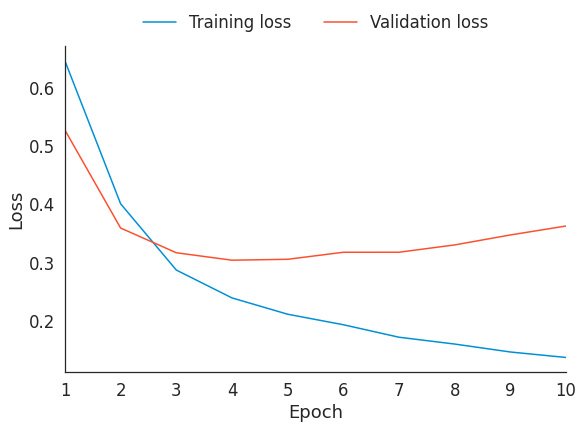

In [ ]:
_, ax = plt.subplots(figsize=(8,6))

epochs = range(1,len(history.history['loss'])+1)

sns.lineplot(x=epochs, y=history.history['loss'], 
             label='Training loss', ax=ax)
sns.lineplot(x=epochs, y=history.history['val_loss'], 
             label='Validation loss', ax=ax)

ax.set_ylabel('Loss')
ax.set_xlabel('Epoch')
ax.set_xlim(1, len(epochs))
ax.legend(loc='lower center', 
          bbox_to_anchor=(0.5, 1), 
          title='', ncol=2, frameon=False)

sns.despine()
plt.show()

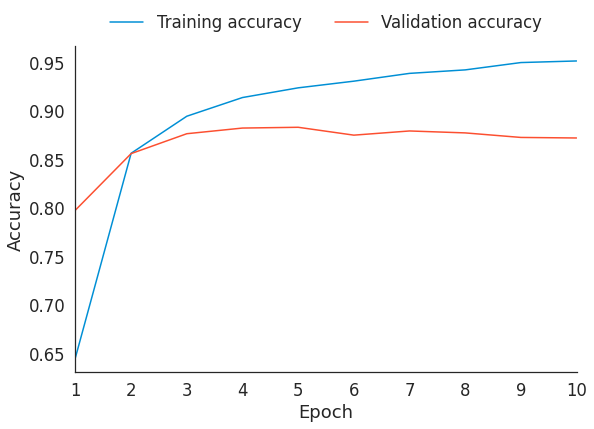

In [ ]:
_, ax = plt.subplots(figsize=(8,6))

epochs = range(1,len(history.history['accuracy'])+1)

sns.lineplot(x=epochs, y=history.history['accuracy'], 
             label='Training accuracy', ax=ax)
sns.lineplot(x=epochs, y=history.history['val_accuracy'], 
             label='Validation accuracy', ax=ax)

ax.set_ylabel('Accuracy')
ax.set_xlabel('Epoch')
ax.set_xlim(1, len(epochs))
ax.legend(loc='lower center', 
          bbox_to_anchor=(0.5, 1), 
          title='', ncol=2, frameon=False)

sns.despine()
plt.show()